In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)
pd.set_option('display.precision', 3)
plt.style.use('ggplot')
%matplotlib inline

# 1. Case1 따라해보기
## sampling density

In [2]:
from scipy.stats import binom, beta

In [3]:
p = 0.3
N = 15

np.random.seed(0)
data = binom(n=1, p=p).rvs(size=N)

print(data)

[0 1 0 0 0 0 0 1 1 0 1 0 0 1 0]


## prior distribution

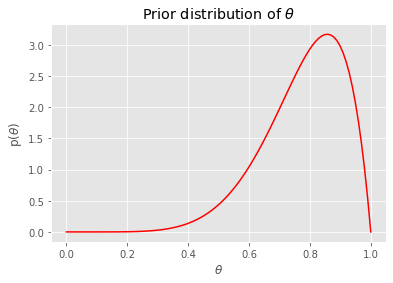

In [4]:
a, b = 7, 2

prior = beta(a, b)
theta = np.linspace(0, 1, num=100)
prior_density = prior.pdf(theta)

plt.plot(theta, prior_density, 'r-')
plt.xlabel(r'$\theta$')
plt.ylabel(r'p($\theta$)')
plt.title(r"Prior distribution of $\theta$")
plt.show()

## likelihood

In [5]:
def likelihood(data, theta):
    from math import factorial as f
    N, S, F = data.size, sum(data), data.size-sum(data)
    const = f(N) / (f(S)*f(F))
    return const*(theta ** S)*((1-theta)**F)

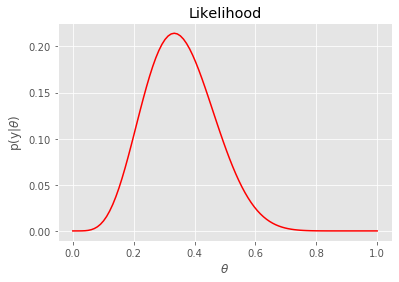

In [6]:
plt.plot(theta, likelihood(data, theta), 'r-')
plt.xlabel(r'$\theta$')
plt.ylabel(r'p(y|$\theta$)')
plt.title(r'Likelihood')
plt.show()

## posterior

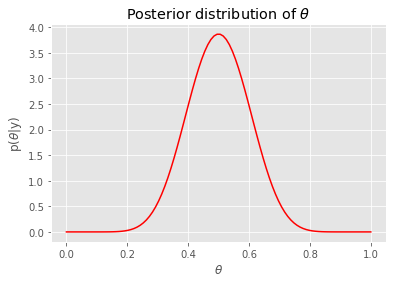

In [7]:
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
post_density = posterior.pdf(theta)
plt.plot(theta, post_density, 'r-')
plt.xlabel(r'$\theta$')
plt.ylabel(r'p($\theta$|y)')
plt.title(r'Posterior distribution of $\theta$')
plt.show()

## 요약

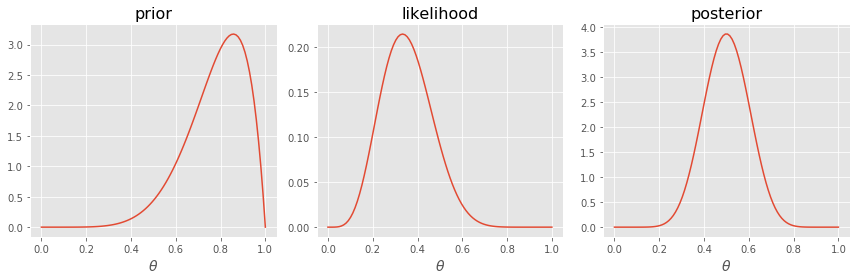

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
density_list = [('prior',prior_density), ('likelihood',likelihood(data, theta)), ('posterior', post_density)]

for ax, (title, density) in zip(axes, density_list):
    ax.plot(theta, density)
    ax.set_xlabel(r'$\theta$', fontdict={'fontsize':14})
    ax.set_title(title, fontdict={'fontsize':16})
    
plt.tight_layout()
plt.show()

# 2. Case2 해보기

unknown: $\mu $<br>
known: $\mu\sim\mathcal{N}(\mu_{0}, \lambda_{0})$ 일때, <br>
$\lambda_{n}=\lambda_{0}+\lambda$, <br>
$\mu_{n}=\frac{\lambda_{0}}{\lambda_{0}+\lambda}\mu_{0}+\frac{\lambda}{\lambda_{0}+\lambda}\mu_{ML}$

## prior

In [9]:
from scipy.stats import norm
from math import sqrt

prior = norm(loc=15, scale=sqrt(10))
mu = np.linspace(0, 30, num=100)
size = 50

np.random.seed(0)
y = norm(loc=22, scale=5).rvs(size=size)
prior_density = prior.pdf(mu)

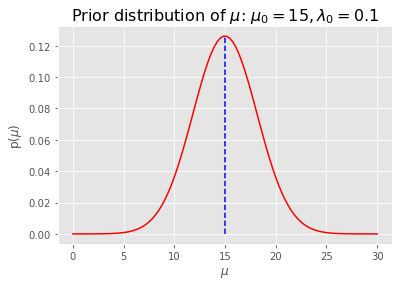

In [10]:
plt.plot(mu, prior_density, 'r-')
plt.vlines(15, ymin=0, ymax=max(prior_density), color='b', linestyle='--')
plt.xlabel(r'$\mu$')
plt.ylabel(r'p($\mu$)')
plt.title(r"Prior distribution of $\mu$: $\mu_{0}=15, \lambda_{0}=0.1$", fontdict={'fontsize':16})
plt.show()

## likelihood

In [11]:
def log_likelihood(y, *, mu):
    """returns log_likelihood of y 
    with constants being removed"""
    res = []
    for m in mu:
        res.append(-np.square((y-m)).sum()/2)
    return res

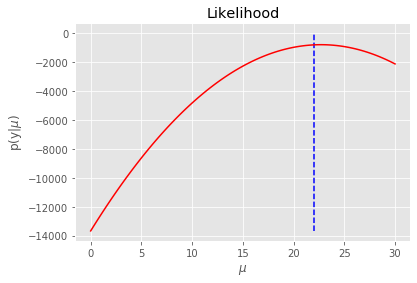

In [12]:
plt.plot(mu, log_likelihood(y, mu=mu), 'r-')
plt.xlabel(r'$\mu$')
plt.ylabel(r'p(y|$\mu$)')
plt.vlines(22, ymin=min(log_likelihood(y, mu=mu)), ymax=0, color='b', linestyle='--')
plt.title(r'Likelihood')
plt.show()

## posterior

Posterior mu: 19.2, lambda: 0.17


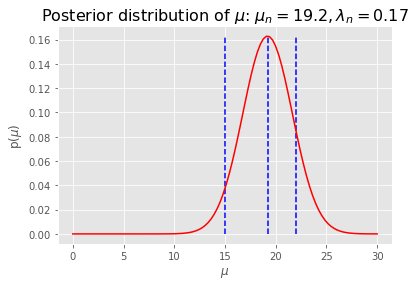

In [13]:
sigma_pos = 1/(1/10+1/15)
mu_pos = (1/15)*(sigma_pos)*15+(1/10)*(sigma_pos)*22
print(f"Posterior mu: {round(mu_pos,2)}, lambda: {round(1/(sigma_pos),2)}")

posterior = norm(loc=mu_pos, scale=sqrt(sigma_pos))
posterior_density = posterior.pdf(mu)

plt.plot(mu, posterior_density, 'r-')
plt.vlines(15, ymin=0, ymax=max(posterior_density), color='b', linestyle='--')
plt.vlines(mu_pos, ymin=0, ymax=max(posterior_density), color='b', linestyle='--')
plt.vlines(22, ymin=0, ymax=max(posterior_density), color='b', linestyle='--')
plt.xlabel(r'$\mu$')
plt.ylabel(r'p($\mu$)')
plt.title(r"Posterior distribution of $\mu$: $\mu_{n}=19.2, \lambda_{n}=0.17$", fontdict={'fontsize':16})
plt.show()

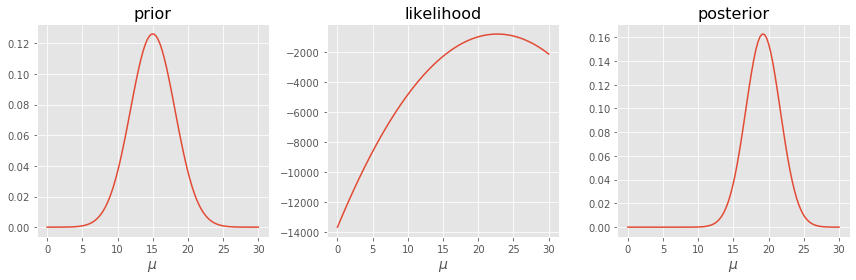

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
density_list = [('prior',prior_density), ('likelihood',log_likelihood(y, mu=mu)), ('posterior', posterior_density)]

for ax, (title, density) in zip(axes, density_list):
    ax.plot(mu, density)
    ax.set_xlabel(r'$\mu$', fontdict={'fontsize':14})
    ax.set_title(title, fontdict={'fontsize':16})
    
plt.tight_layout()
plt.show()